# IMPORT

## import library

In [1]:
## Basic Library
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [2]:
df = pd.read_csv('SBAnational.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [4]:
df.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
631524,6273944009,THE THINKING CHILD LEARNING CE,FLORIDA CITY,FL,33034,FIRST-CITIZENS BK & TR CO,NC,624410,25-Apr-03,2003,...,0,N,NaN,31-Jul-03,"$184,000.00",$0.00,P I F,$0.00,"$184,000.00","$138,000.00"
358781,3500775010,TEM Office Products Inc,Miami,FL,33172,TOTALBANK,FL,423990,6-Jul-09,2009,...,Y,N,29-May-12,31-Jul-09,"$207,400.00",$0.00,CHGOFF,"$194,406.00","$200,000.00","$100,000.00"
168370,2208794007,HONIG'S SOUTHWEST,BRYAN,TX,77801,WELLS FARGO BANK NATL ASSOC,TX,451110,22-Jul-98,1998,...,0,Y,NaN,31-Aug-98,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$60,000.00"
646714,6472684006,NUPHASE INC,LYNN,MA,1901,DANVERSBANK,MA,811113,8-Jul-03,2003,...,0,N,NaN,31-Aug-03,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$85,000.00"
114571,1838095005,TIMOTHY C. RACINE DBA TIMOTHY,BRATTLEBORO,VT,5301,CITIZENS BANK NATL ASSOC,RI,113310,24-May-06,2006,...,Y,N,NaN,31-Jul-06,"$37,602.00",$0.00,P I F,$0.00,"$35,000.00","$17,500.00"


# DATA CLEANSING

In [5]:
# tipe data awal
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

## Handling Null Values

In [6]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [7]:
## Drop kolom ChgOffDate karna tidak diperlukan
df.drop(columns=['ChgOffDate'], inplace=True)

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [10]:
df.shape

(886240, 26)

## Handling Duplicated Data

In [11]:
## check duplicated data
df.duplicated().any()

False

## Handling Data Type

In [12]:
# Ubah kolom ApprovalDate, CharDisbursementDate, ChgOffDate menjadi datetime

df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 0 to 899163
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      886240 non-null  int64         
 1   Name               886240 non-null  object        
 2   City               886240 non-null  object        
 3   State              886240 non-null  object        
 4   Zip                886240 non-null  int64         
 5   Bank               886240 non-null  object        
 6   BankState          886240 non-null  object        
 7   NAICS              886240 non-null  int64         
 8   ApprovalDate       886240 non-null  datetime64[ns]
 9   ApprovalFY         886240 non-null  object        
 10  Term               886240 non-null  int64         
 11  NoEmp              886240 non-null  int64         
 12  NewExist           886240 non-null  float64       
 13  CreateJob          886240 non-null  int64   

In [14]:
## Cleansing data curency $ dan ,
currency = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[currency] = df[currency].applymap(lambda x: x.replace('$', '').replace(',', ''))

## Ubah kolom DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv menjadi float
df[currency] = df[currency].astype(float)

In [15]:
df.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                   object
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                   object
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
dtype: object

In [16]:
df[['CreateJob', 'RetainedJob']].sample(5)

,CreateJob,RetainedJob
763172,3,2
899077,0,0
99034,0,0
330648,0,0
235577,0,0


In [17]:
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].sample(5)

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
326264,41000.0,0.0,33898.0,41000.0,34850.0
96706,175000.0,0.0,0.0,175000.0,131250.0
32584,218467.0,0.0,96782.0,100000.0,50000.0
752390,325000.0,0.0,0.0,325000.0,243750.0
497072,100000.0,0.0,0.0,100000.0,90000.0


In [18]:
## Handle kolom ApprovalFY
df['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1982', '1983',
       '1973', '1984', '2007', '1985', '1986', '1987', '2008', '1988',
       '2009', '1989', '1991', '1990', '1974', '2010', '2011', '1992',
       '1993', '2002', '2012', '2013', '1994', '2014', '1975', '1977',
       '1976', '1968', '1976A', '1969', '1995', '1970', '1996', '1971'],
      dtype=object)

In [19]:
## Hilangkan huruf A pada '1976A' lalu ubah ke int
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

df['ApprovalFY']=df['ApprovalFY'].apply(clean_str).astype(int)
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, 1968, 1969, 1995,
       1970, 1996, 1971])

In [20]:
## Ubah tipe data 'NewExist' menjadi int
df['NewExist'] = df['NewExist'].astype(int)

df['NewExist'].unique()

array([2, 1, 0])

In [21]:
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

df['NewBusiness'] = df['NewBusiness'].astype(int)
df['NewBusiness'].unique()

array([1, 0])

In [22]:
## Ubah tipe data 'NAICS' dari numeric ke object
df['NAICS'] = df['NAICS'].astype(str)

# DATA PROCESSING

## Feature Encoding

In [23]:
## filter value 'NewExist' hanya 1 dan 2
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

## filter value 'RevLineCr' hanya Y dan N
df = df[(df.RevLineCr == 'Y') | (df.RevLineCr == 'N')]

## filter value 'LowDoc' hanya Y dan N
df = df[(df.LowDoc == 'Y') | (df.LowDoc == 'N')]

## filter value 'NAICS' yang hanya memiliki angka selain 0
df = df[df['NAICS'] != 0]

## filter value 'Term' harus > 0
df = df[df['Term'] > 0]

In [24]:
print('NewExist setelah difilter:',df['NewExist'].unique())
print('RevLineCr setelah difilter', df['RevLineCr'].unique())
print('LowDoc setelah difilter', df['LowDoc'].unique())

NewExist setelah difilter: [2 1]
RevLineCr setelah difilter ['N' 'Y']
LowDoc setelah difilter ['Y' 'N']


In [25]:
# feature encoding 'RevLineCr' & LowDoc nilai diubah Y=1, N=0
df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'Y', 1, 0)

In [26]:
df['LowDoc'].unique()

array([1, 0])

In [27]:
df['RevLineCr'].unique()

array([0, 1])

In [28]:
# membuat kolom baru (default) dan mengubah nilainya menjadi default = 1, no default = 0
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)

In [29]:
df['Default'].unique()

array([0, 1])

In [30]:
# membuat kolom baru (daysdisbursment) = AppDate-DisbDate
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

In [31]:
df[['DaysToDisbursement']].sample(3)

,DaysToDisbursement
474391,0 days
507171,123 days
119723,32 days


In [32]:
## hapus days pada output DaysToDisbursement dan ubah ke int
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [33]:
df[['DaysToDisbursement']].sample(3)

,DaysToDisbursement
709844,107
330815,39
766924,81


In [34]:
## Ambil output tahun pada DisbursementDate
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

In [35]:
df['DisbursementFY'].unique()

array([1999, 1997, 1980, 1998, 2006, 2002, 2001, 2000, 2003, 1982, 2004,
       2071, 2005, 2009, 2007, 2008, 1981, 2072, 1978, 1979, 1996, 2010,
       1995, 2012, 1983, 1985, 1984, 2048, 1987, 1973, 1986, 2011, 1988,
       1989, 2013, 1990, 1991, 2014, 1992, 1993, 1994, 2020, 1974, 2028,
       1975, 1976, 1977, 2069, 2070])

In [36]:
df['DisbursementFY'].value_counts()

2006    58989
2007    54703
2005    48036
1995    37300
2004    35395
1994    30583
1996    28452
2003    27850
1997    27046
2008    26930
1993    22104
2002    19602
1992    19371
2009    18524
1998    17785
2000    16312
1999    15983
2010    15634
2001    15614
1991    15478
1990    14203
1989    11525
2011    10683
2012     5292
2013     2228
1987     2146
1988     2048
1986     2032
1985     1968
1984     1906
1983     1170
1982      631
1980      488
1981      422
1979      329
1978      243
2014      229
1977      128
1976       65
1975       45
1973       43
2072       35
1974       33
2071       15
2070       14
2069        2
2020        1
2028        1
2048        1
Name: DisbursementFY, dtype: int64

In [37]:
## Buat kolom baru yang menentukan peminjam dan bank berada pada state yang sama
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

In [38]:
## Buat kolom baru untuk melihat persentase pinjaman yang dijamin SBA
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

In [39]:
df[['SBA_Appv', 'GrAppv', 'SBA_AppvPct']].head()

,SBA_Appv,GrAppv,SBA_AppvPct
0,48000.0,60000.0,0.80
1,32000.0,40000.0,0.80
2,215250.0,287000.0,0.75
3,28000.0,35000.0,0.80
4,229000.0,229000.0,1.00


In [40]:
## Buat kolom baru untuk melihat apakah pinjaman dicairkan atau tidak
df['AppvDisbursed'] = np.where(df['DisbursementGross'] == df['GrAppv'], 1, 0)

In [41]:
df[['DisbursementGross', 'GrAppv', 'AppvDisbursed']].sample(2)

,DisbursementGross,GrAppv,AppvDisbursed
152560,199185.0,100000.0,0
419705,485000.0,485000.0,1


In [42]:
df.loc[(df['FranchiseCode'] <= 1), 'Franchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'Franchise'] = 1

In [43]:
df['Franchise'].unique()

array([0., 1.])

In [44]:
df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

In [45]:
df['NewBusiness'].unique()

array([1, 0])

In [46]:
df = df.astype({'Franchise': 'int64', 'NewBusiness': 'int64', 'AppvDisbursed' :'int64' })

In [47]:
df[['Franchise', 'NewBusiness', 'AppvDisbursed']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Franchise      609617 non-null  int64
 1   NewBusiness    609617 non-null  int64
 2   AppvDisbursed  609617 non-null  int64
dtypes: int64(3)
memory usage: 18.6 MB


In [48]:
## Membuat kolom baru industri dengan mengambil 2 digit pertama pada kolom NAICS
df['Industri'] = df['NAICS'].apply(lambda x: x[:2])

## Melakukan mapping kolom industri berdasarkan 2 digit pertama pada kolom NAICS
df['Industri'] = df['Industri'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesales_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '91': 'Public_admin'
})
df['Industri'].value_counts()

Retail_trade                80847
Construction                49154
Prof/Science/Tech           49151
Manufacturing               45471
Other_no_pub                44766
Wholesales_trade            34763
Healthcare/Social_assist    34482
Accom/Food_serv             34237
Admin_sup/Waste_Mgmt_Rem    21989
Trans/Ware                  15378
RE/Rental/Lease              9539
Arts/Entertain/Rec           9257
Ag/For/Fish/Hunt             7627
Information                  7345
Finance/Insurance            6327
Educational                  4001
Min/Quar/Oil_Gas             1352
Utilities                     434
Mgmt_comp                     119
Name: Industri, dtype: int64

In [49]:
## Buat kolom baru apakah pinjaman dilakukan pada saat resesi atau tidak
df['GreatRecession'] = np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY']<=2009)),1,0)

In [50]:
df[['Industri', 'GreatRecession']].sample(10)

,Industri,GreatRecession
141265,Wholesales_trade,0
649650,Educational,0
298485,Other_no_pub,0
392929,NaN,0
361355,Retail_trade,0
450008,Accom/Food_serv,0
97517,Retail_trade,0
494978,Other_no_pub,0
249887,Prof/Science/Tech,1
204179,Retail_trade,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       609617 non-null  int64         
 1   Name                609617 non-null  object        
 2   City                609617 non-null  object        
 3   State               609617 non-null  object        
 4   Zip                 609617 non-null  int64         
 5   Bank                609617 non-null  object        
 6   BankState           609617 non-null  object        
 7   NAICS               609617 non-null  object        
 8   ApprovalDate        609617 non-null  datetime64[ns]
 9   ApprovalFY          609617 non-null  int64         
 10  Term                609617 non-null  int64         
 11  NoEmp               609617 non-null  int64         
 12  NewExist            609617 non-null  int64         
 13  CreateJob           609617 no

In [52]:
df1 = df.copy()

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       609617 non-null  int64         
 1   Name                609617 non-null  object        
 2   City                609617 non-null  object        
 3   State               609617 non-null  object        
 4   Zip                 609617 non-null  int64         
 5   Bank                609617 non-null  object        
 6   BankState           609617 non-null  object        
 7   NAICS               609617 non-null  object        
 8   ApprovalDate        609617 non-null  datetime64[ns]
 9   ApprovalFY          609617 non-null  int64         
 10  Term                609617 non-null  int64         
 11  NoEmp               609617 non-null  int64         
 12  NewExist            609617 non-null  int64         
 13  CreateJob           609617 no

## Feature selection

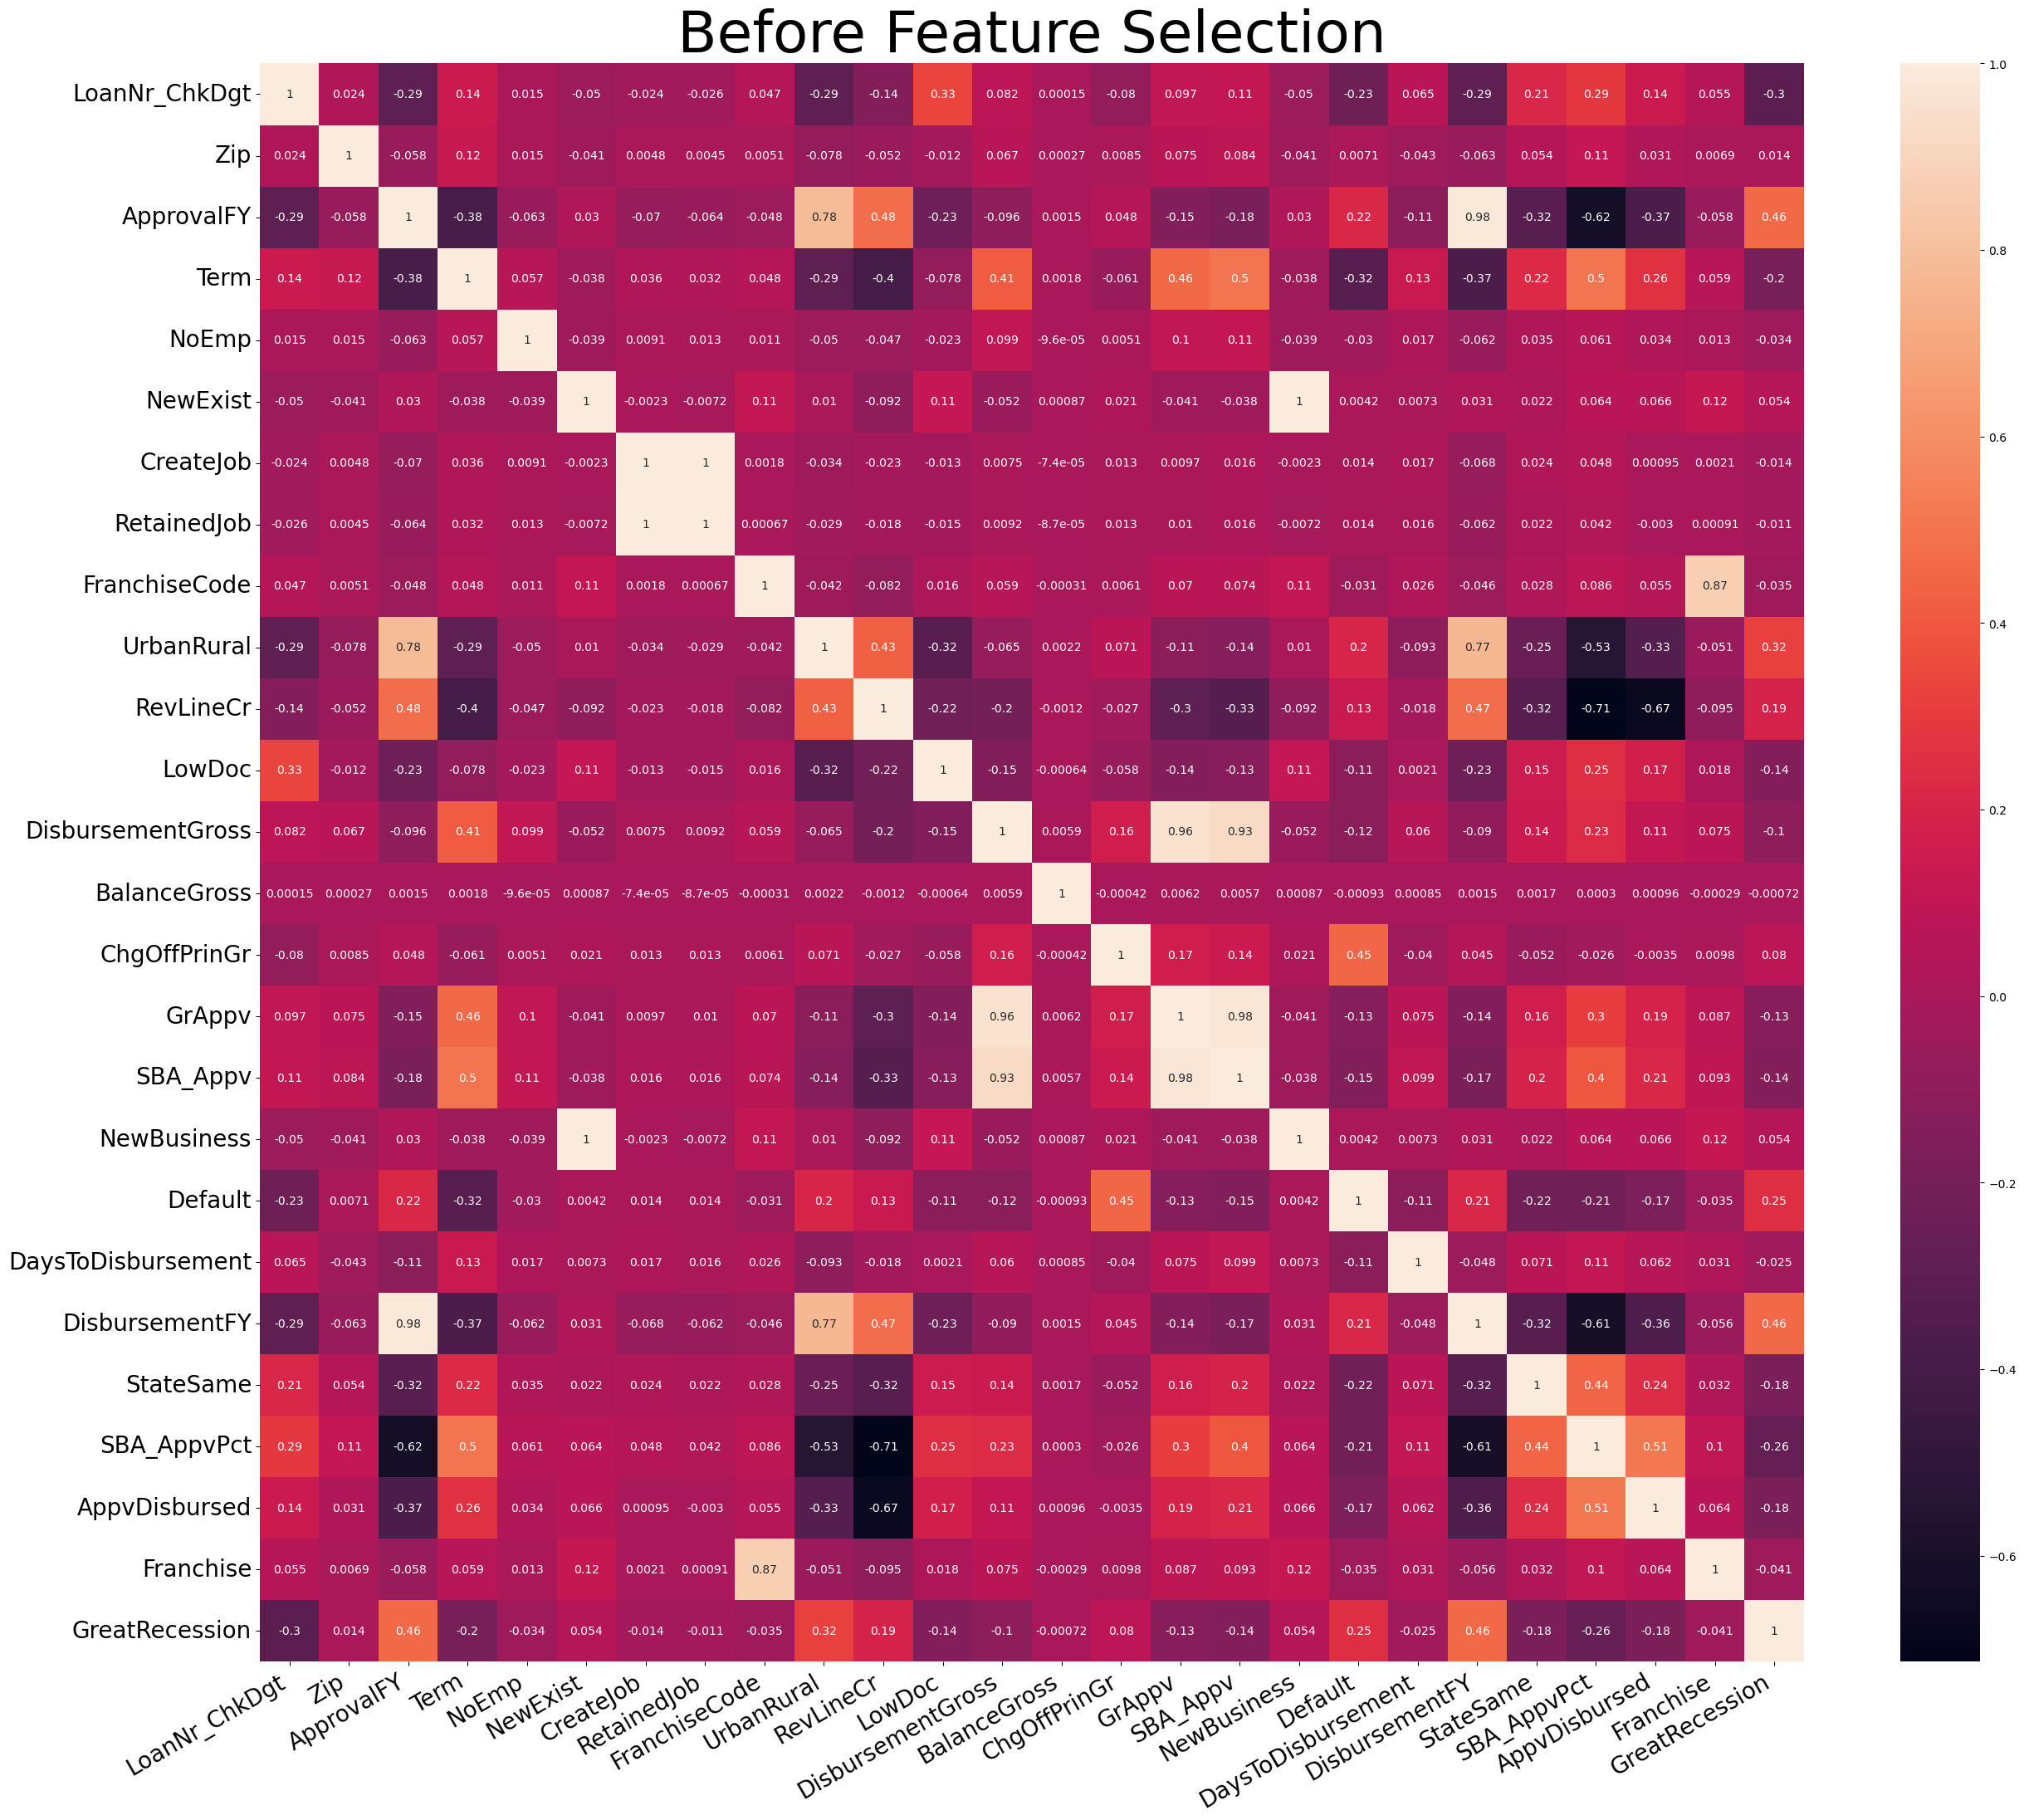

In [54]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df1.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.title("Before Feature Selection", fontsize = 50)
plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [55]:
df1.drop(columns=[
                    'LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 
                    'NewExist', 'FranchiseCode', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 
                    'SBA_Appv', 'MIS_Status', 'RetainedJob', 'ApprovalFY', 'GrAppv', 'DisbursementFY',
                    'State', 'BankState', 'Industri'
                 ], inplace=True)

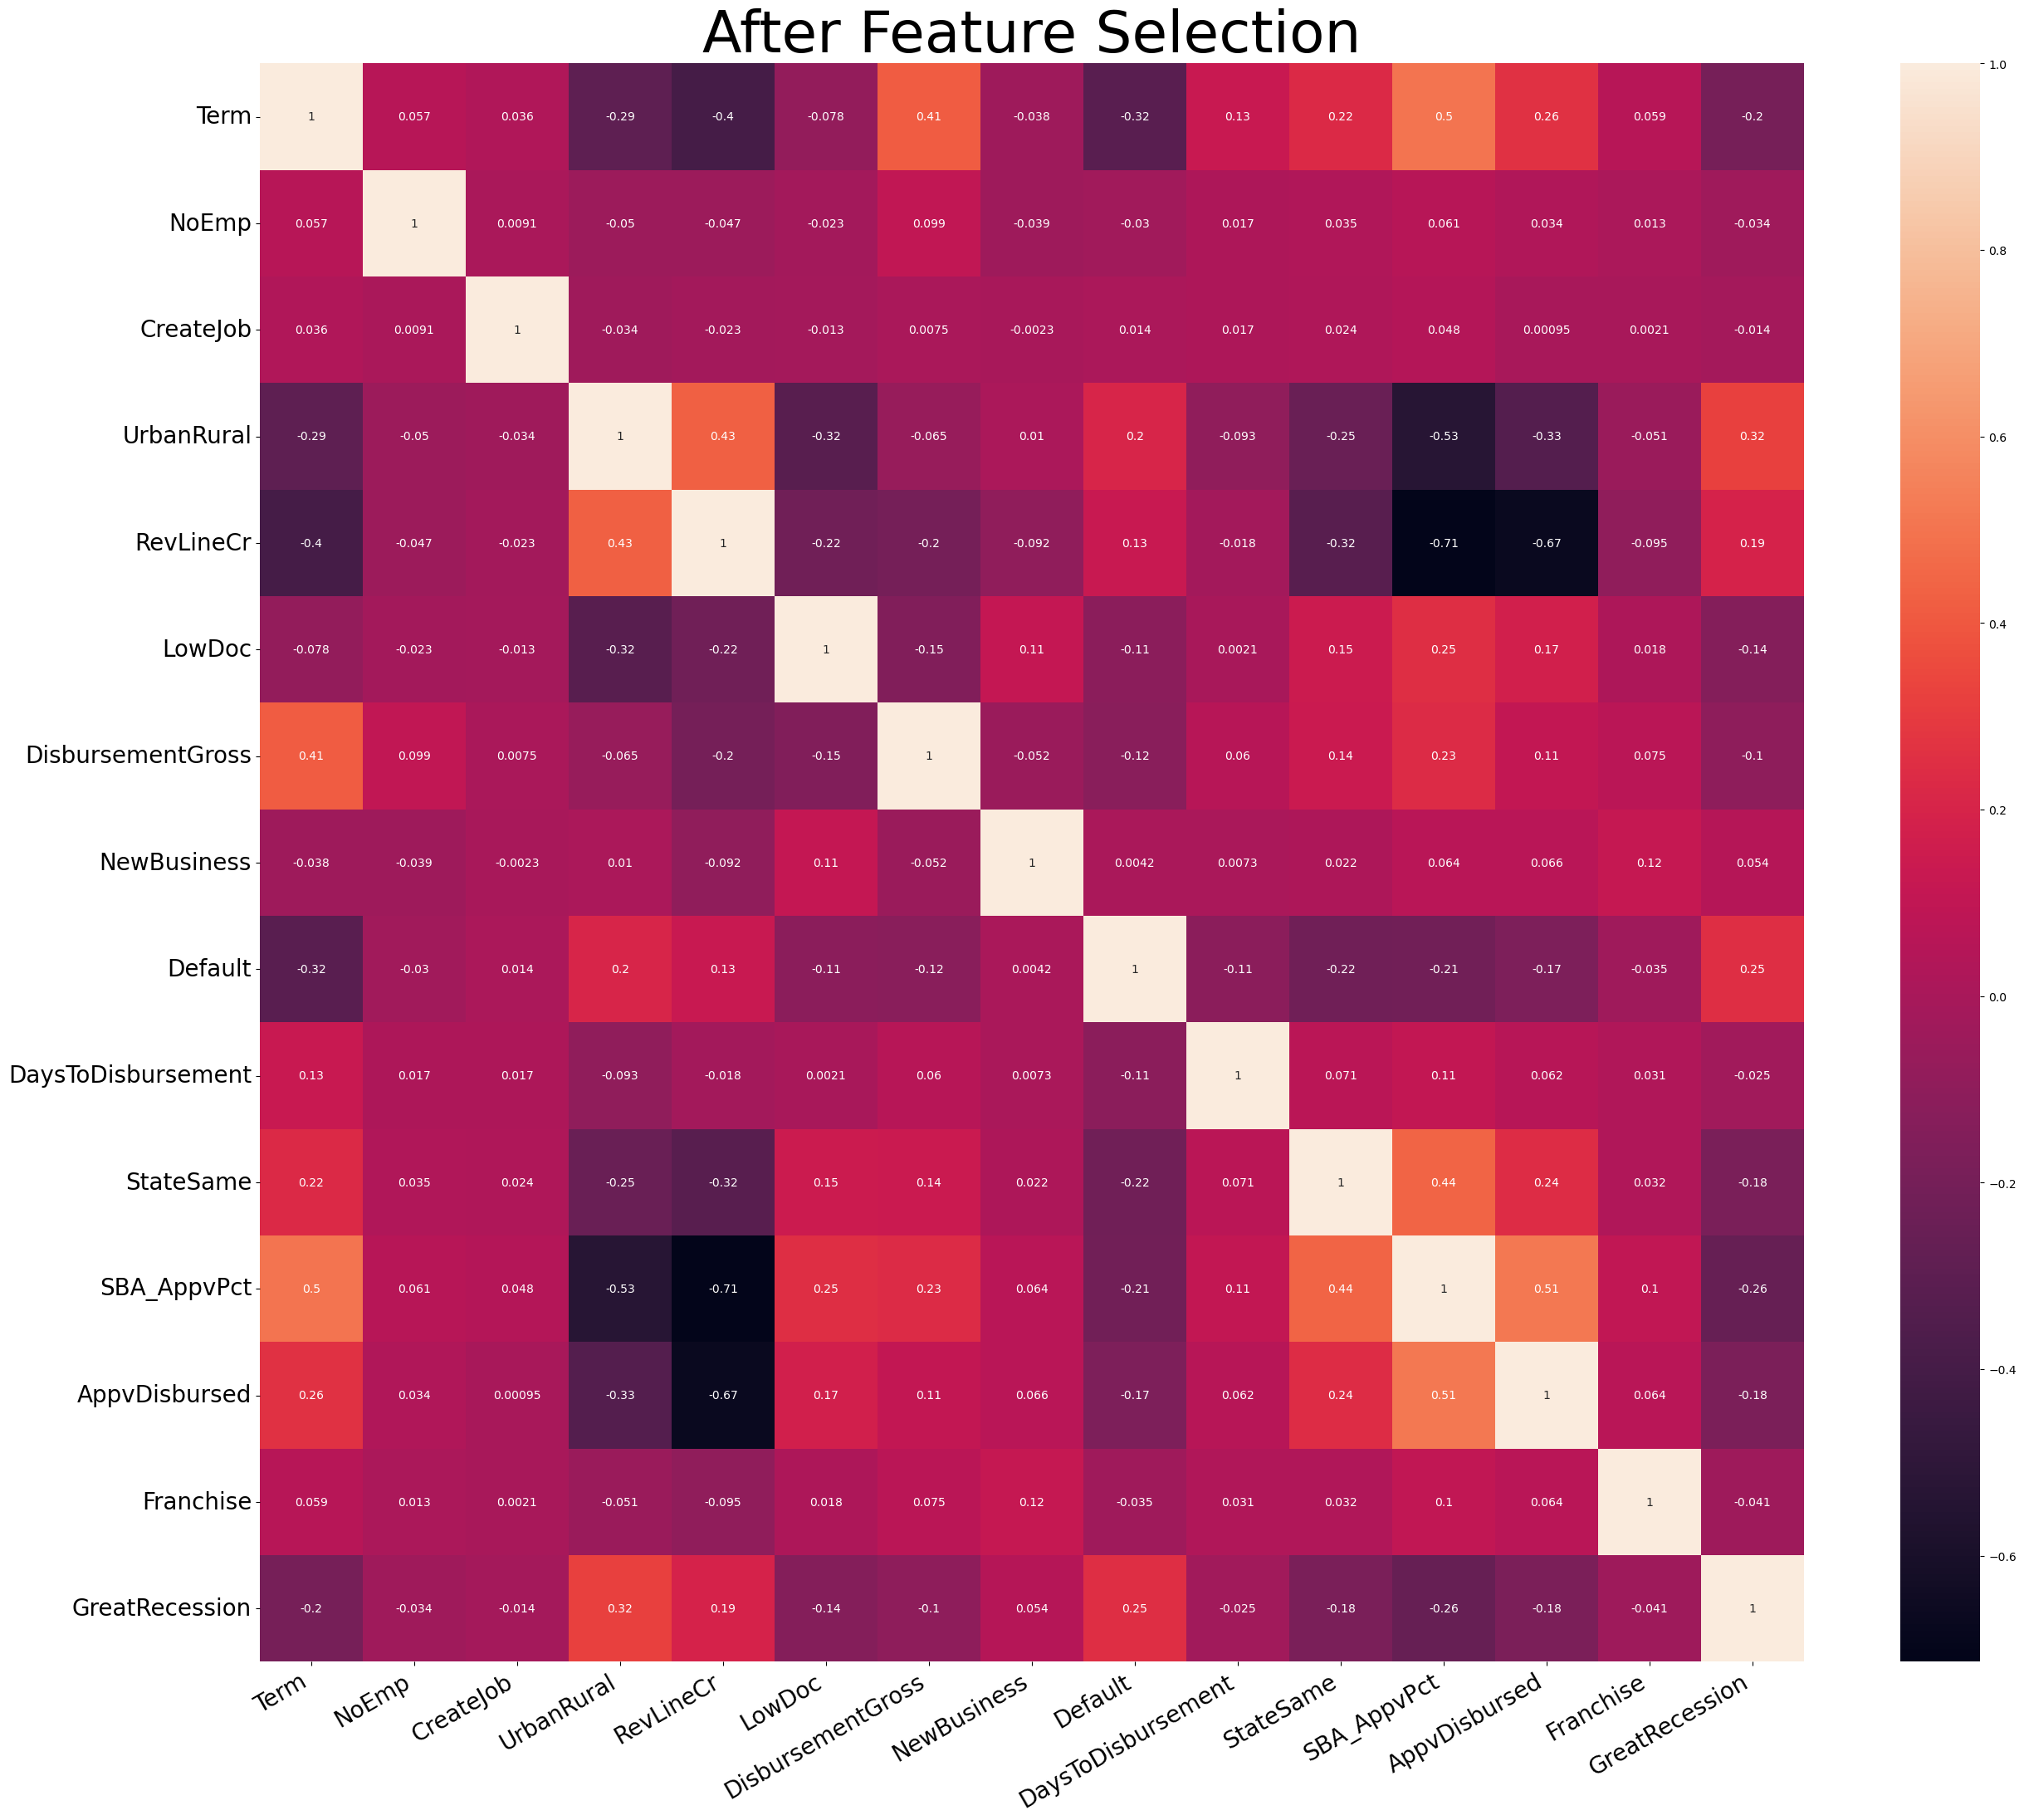

In [56]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df1.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)
                               
plt.title("After Feature Selection", fontsize = 50)
plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(rotation = 0, fontsize = 20)
plt.show()

In [57]:
df1.sample(5)

,Term,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,NewBusiness,Default,DaysToDisbursement,StateSame,SBA_AppvPct,AppvDisbursed,Franchise,GreatRecession
149137,120,2,0,1,0,0,178000.0,1,0,67,0,0.75,1,0,0
16394,84,2,0,1,1,0,17972.0,1,0,25,0,0.50,0,0,0
10783,84,1,0,2,1,0,13400.0,0,0,117,0,0.50,0,0,0
865800,240,2,3,0,0,0,139000.0,0,0,519,1,1.00,1,0,0
878772,60,2,0,0,0,1,21025.0,1,0,81,1,0.80,1,0,0


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Term                609617 non-null  int64  
 1   NoEmp               609617 non-null  int64  
 2   CreateJob           609617 non-null  int64  
 3   UrbanRural          609617 non-null  int64  
 4   RevLineCr           609617 non-null  int64  
 5   LowDoc              609617 non-null  int64  
 6   DisbursementGross   609617 non-null  float64
 7   NewBusiness         609617 non-null  int64  
 8   Default             609617 non-null  int64  
 9   DaysToDisbursement  609617 non-null  int64  
 10  StateSame           609617 non-null  int64  
 11  SBA_AppvPct         609617 non-null  float64
 12  AppvDisbursed       609617 non-null  int64  
 13  Franchise           609617 non-null  int64  
 14  GreatRecession      609617 non-null  int64  
dtypes: float64(2), int64(13)
memory us

## Feature Transformation

In [59]:
## bandingkan metode log transformation dengan boxcox berdasarkan nilai skewnes

print('Nilai skew log transform', (np.log(df1['Term'])).skew())
print('Nilai skew boxcox transform', pd.Series(st.boxcox(df1['Term'])[0]).skew())

## karna angkanya lebih bagus boxcox maka akan digunakan metode boxcox

Nilai skew log transform -1.1493926613879553
Nilai skew boxcox transform 0.02376689851086981


In [60]:
df1['Term_bc'] = st.boxcox(df1['Term'])[0]
df1['DisbursementGross_bc'] = st.boxcox(df1['DisbursementGross'])[0]

In [61]:
## Melihat nilai skew sebelum dan sesudah transform
print('Nilai skew sebelum transformation', df1['Term'].skew())
print('Nilai skew sebelum transformation', df1['DisbursementGross'].skew())
print('Nilai skew sesudah transformation', df1['Term_bc'].skew())
print('Nilai skew sesudah transformation', df1['DisbursementGross_bc'].skew())

Nilai skew sebelum transformation 1.1858527369708123
Nilai skew sebelum transformation 4.73423672016642
Nilai skew sesudah transformation 0.02376689851086981
Nilai skew sesudah transformation 0.00201156855115878


In [62]:
features_transform = ['Term','DisbursementGross', 'Term_bc', 'DisbursementGross_bc']

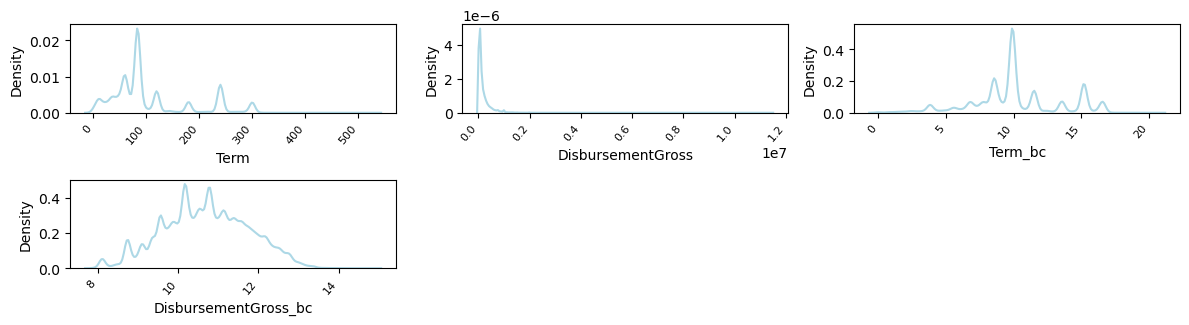

In [63]:
features = features_transform
plt.figure(figsize=(12,6))

for i in range(0, len(features)):
  plt.subplot(4,3, i+1)
  sns.kdeplot(df1[features[i]], color='lightblue')
  plt.xlabel(features[i])
  plt.xticks(rotation=50, horizontalalignment='right', fontsize=8)
  plt.tight_layout()

In [64]:
## drop Term dan DisbursementGross karna sudah diganti
df1 = df1.drop(['Term', 'DisbursementGross'], axis=1)

In [65]:
df1.describe()

,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,NewBusiness,Default,DaysToDisbursement,StateSame,SBA_AppvPct,AppvDisbursed,Franchise,GreatRecession,Term_bc,DisbursementGross_bc
count,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000,609617.000000
mean,11.981488,11.110835,0.692194,0.324272,0.093578,0.270650,0.180482,119.568450,0.525535,0.698589,0.707352,0.042102,0.164295,10.126127,10.698835
std,75.457805,285.089449,0.652545,0.468103,0.291242,0.444296,0.384589,253.403194,0.499348,0.183384,0.454978,0.200822,0.370543,3.243370,1.058872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-36496.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,7.911259
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.500000,0.000000,0.000000,0.000000,8.571213,9.977188
50%,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1.000000,0.750000,1.000000,0.000000,0.000000,9.918224,10.707154
75%,11.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,126.000000,1.000000,0.850000,1.000000,0.000000,0.000000,11.516619,11.460186
max,9999.000000,8800.000000,2.000000,1.000000,1.000000,1.000000,1.000000,24132.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.537492,14.826327


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609617 entries, 0 to 899163
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NoEmp                 609617 non-null  int64  
 1   CreateJob             609617 non-null  int64  
 2   UrbanRural            609617 non-null  int64  
 3   RevLineCr             609617 non-null  int64  
 4   LowDoc                609617 non-null  int64  
 5   NewBusiness           609617 non-null  int64  
 6   Default               609617 non-null  int64  
 7   DaysToDisbursement    609617 non-null  int64  
 8   StateSame             609617 non-null  int64  
 9   SBA_AppvPct           609617 non-null  float64
 10  AppvDisbursed         609617 non-null  int64  
 11  Franchise             609617 non-null  int64  
 12  GreatRecession        609617 non-null  int64  
 13  Term_bc               609617 non-null  float64
 14  DisbursementGross_bc  609617 non-null  float64
dtype

In [67]:
# Memisahkan features dan target
X = df1.drop(columns=['Default']) # menggunakan semua feature kecuali target
y = df1['Default']

In [68]:
## memisahkan data train dan test
## Data train 70%, data test 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
## Standarisasi

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = X.columns.to_list()
for n in numerical_features:
    scaler = ss.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])

In [70]:
X_train.describe()

,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,NewBusiness,DaysToDisbursement,StateSame,SBA_AppvPct,AppvDisbursed,Franchise,GreatRecession,Term_bc,DisbursementGross_bc
count,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05,4.267310e+05
mean,4.903671e-18,4.329217e-18,1.953143e-17,5.619657e-17,3.403431e-17,-7.609431e-18,1.258803e-17,5.776175e-17,-5.110911e-16,1.056329e-16,-2.578382e-17,3.823032e-17,4.516539e-18,1.000605e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.582743e-01,-3.897676e-02,-1.062028e+00,-6.935122e-01,-3.207368e-01,-6.091530e-01,-1.450133e+02,-1.052042e+00,-3.426164e+00,-1.553085e+00,-2.088846e-01,-4.431220e-01,-3.120889e+00,-2.633420e+00
25%,-1.318927e-01,-3.897676e-02,-1.062028e+00,-6.935122e-01,-3.207368e-01,-6.091530e-01,-3.559362e-01,-1.052042e+00,-1.081428e+00,-1.553085e+00,-2.088846e-01,-4.431220e-01,-4.789112e-01,-6.818385e-01
50%,-1.055111e-01,-3.897676e-02,4.701462e-01,-6.935122e-01,-3.207368e-01,-6.091530e-01,-2.292035e-01,9.505320e-01,2.817912e-01,6.438797e-01,-2.088846e-01,-4.431220e-01,-6.371052e-02,7.461891e-03
75%,-1.317552e-02,-3.546547e-02,4.701462e-01,1.441936e+00,-3.207368e-01,1.641624e+00,2.426178e-02,9.505320e-01,8.270788e-01,6.438797e-01,-2.088846e-01,-4.431220e-01,4.289765e-01,7.218559e-01
max,1.317365e+02,3.086035e+01,2.002320e+00,1.441936e+00,3.117821e+00,1.641624e+00,9.509751e+01,9.505320e-01,1.645010e+00,6.438797e-01,4.787333e+00,2.256715e+00,3.209557e+00,3.898905e+00


In [71]:
X_train.value_counts().sum()

426731

In [72]:
X_test.value_counts().sum()

182886

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate


def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Test Set) : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Test Set) : %.2f' % precision_score(y_test, y_pred))
    print('Recall (Test Set) : %.2f' % recall_score(y_test, y_pred))
    print('F-1-Score (Test Set) : %.2f' % f1_score(y_test, y_pred))
    
    print('AUC (test-proba) : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print('AUC (train-proba) : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## DT

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

eval_classification(dt)

Accuracy (Test Set) : 0.91
Precision (Test Set) : 0.75
Recall (Test Set) : 0.76
F-1-Score (Test Set) : 0.76
AUC (test-proba) : 0.85
AUC (train-proba) : 1.00
recall (crossval train): 0.9992478982049533
recall (crossval test): 0.7172369915928198


In [75]:
#Melakukan Tuning Hyperparameter
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, random_state=42, cv=5, scoring='recall')
dt_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = dt_tuned.predict(X_test) 
eval_classification(dt_tuned)

Accuracy (Test Set) : 0.91
Precision (Test Set) : 0.77
Recall (Test Set) : 0.71
F-1-Score (Test Set) : 0.74
AUC (test-proba) : 0.89
AUC (train-proba) : 0.99
recall (crossval train): 0.7955850942967506
recall (crossval test): 0.66075891842763


In [76]:
dt_tuned.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 87}

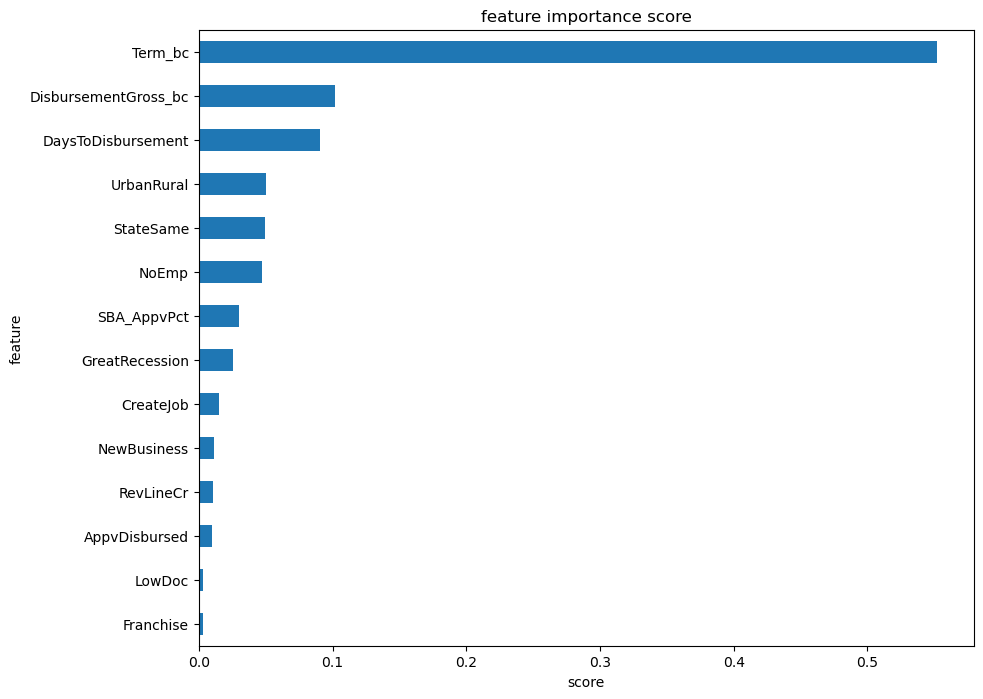

In [80]:
show_feature_importance(dt)

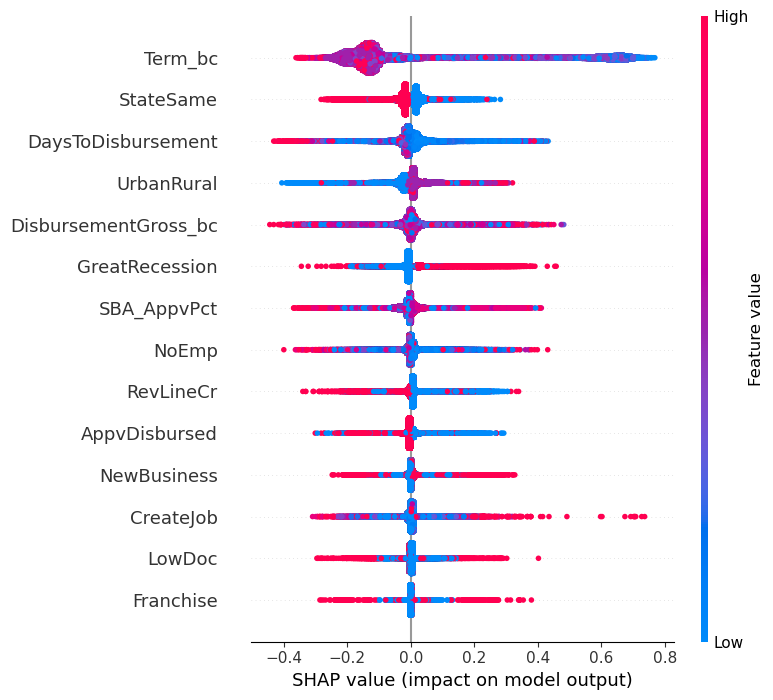

In [81]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

**Overfit**

## RF

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

eval_classification(rf)

Accuracy (Test Set) : 0.94
Precision (Test Set) : 0.87
Recall (Test Set) : 0.76
F-1-Score (Test Set) : 0.81
AUC (test-proba) : 0.96
AUC (train-proba) : 1.00
recall (crossval train): 0.9992887980004544
recall (crossval test): 0.7050852079072938


In [84]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=42, cv=5)
rf_tuned.fit(X_train, y_train)
eval_classification(rf_tuned)

Accuracy (Test Set) : 0.94
Precision (Test Set) : 0.88
Recall (Test Set) : 0.76
F-1-Score (Test Set) : 0.81
AUC (test-proba) : 0.97
AUC (train-proba) : 0.99
recall (crossval train): 0.8323358327652807
recall (crossval test): 0.7019495569188821


In [85]:
rf_tuned.best_params_

{'n_estimators': 74,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_depth': 46,
 'criterion': 'gini'}

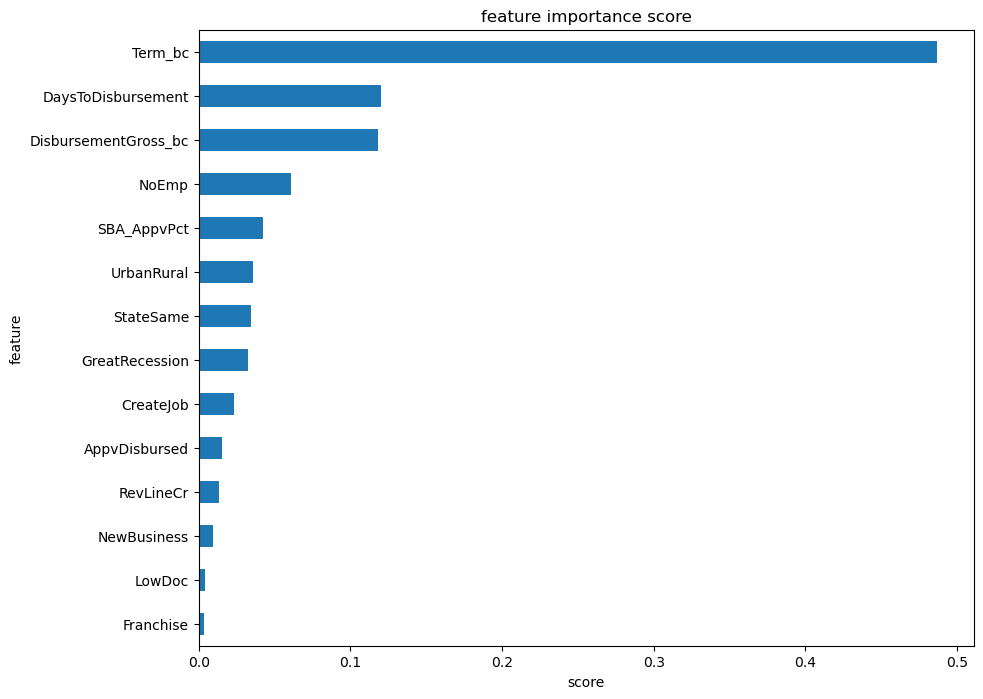

In [83]:
show_feature_importance(rf)

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

## LR

In [149]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn

logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set) : 0.86
Precision (Test Set) : 0.70
Recall (Test Set) : 0.38
F-1-Score (Test Set) : 0.49
AUC (test-proba) : 0.85
AUC (train-proba) : 0.85
recall (crossval train): 0.3673369688707112
recall (crossval test): 0.26676664394455807


In [73]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
logreg_tuned = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=42, cv=5, n_iter=50)
logreg_tuned.fit(X_train, y_train)

y_pred = log_reg.predict(X_test) 
eval_classification(logreg_tuned)

Accuracy (Test Set) : 0.85
Precision (Test Set) : 0.68
Recall (Test Set) : 0.32
F-1-Score (Test Set) : 0.43
AUC (test-proba) : 0.84
AUC (train-proba) : 0.84
roc_auc (crossval train): 0.8345286334273052
roc_auc (crossval test): 0.8277443347101157


## XGBOOST

In [86]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set) : 0.94
Precision (Test Set) : 0.87
Recall (Test Set) : 0.81
F-1-Score (Test Set) : 0.84
AUC (test-proba) : 0.97
AUC (train-proba) : 0.98
recall (crossval train): 0.83031129288798
recall (crossval test): 0.7624358100431721


In [89]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test) 
eval_classification(xg_tuned)

Accuracy (Test Set) : 0.94
Precision (Test Set) : 0.86
Recall (Test Set) : 0.82
F-1-Score (Test Set) : 0.84
AUC (test-proba) : 0.97
AUC (train-proba) : 0.99
recall (crossval train): 0.8763667348329924
recall (crossval test): 0.7624448988866167


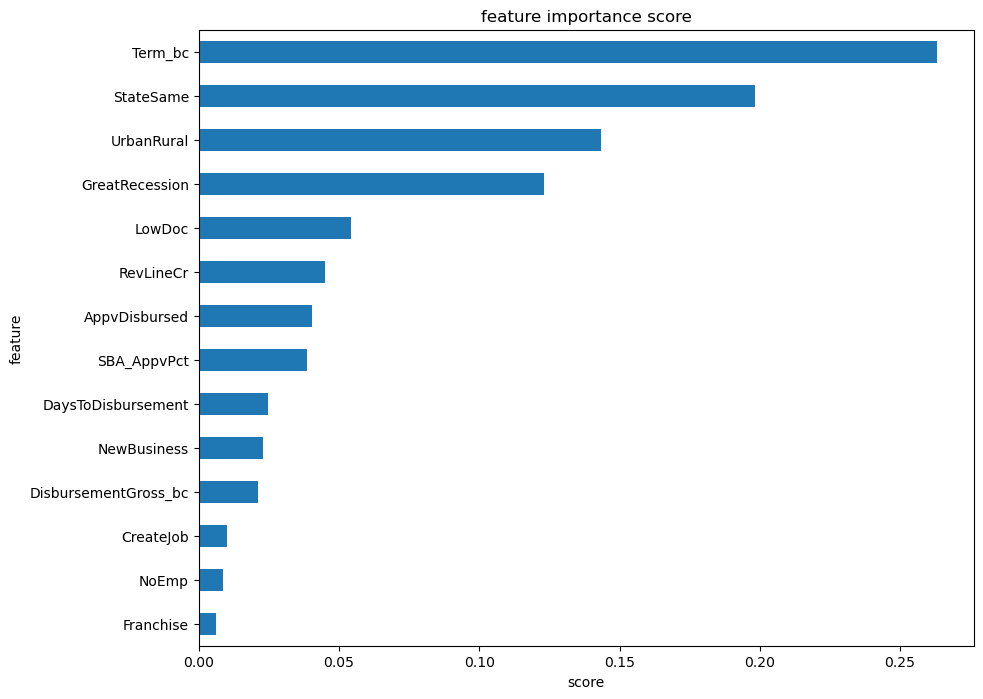

In [87]:
show_feature_importance(xg)

## ADABOOST

In [79]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)
eval_classification(abc)

Accuracy (Test Set) : 0.91
Precision (Test Set) : 0.77
Recall (Test Set) : 0.68
F-1-Score (Test Set) : 0.72
AUC (test-proba) : 0.94
AUC (train-proba) : 0.94
recall (crossval train): 0.6715110202226767
recall (crossval test): 0.5822131333787776


In [69]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 200)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.5, stop = 2.0, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
abc = AdaBoostClassifier(random_state=42)
abc_tuned = RandomizedSearchCV(abc, hyperparameters, random_state=42, cv=5, scoring='recall')
abc_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = abc_tuned.predict(X_test) 
eval_classification(abc_tuned)

Accuracy (Test Set) : 0.93
Precision (Test Set) : 0.82
Recall (Test Set) : 0.78
F-1-Score (Test Set) : 0.80
AUC (test-proba) : 0.96
AUC (train-proba) : 0.96
roc_auc (crossval train): 0.9625714891968344
roc_auc (crossval test): 0.8839696571930705


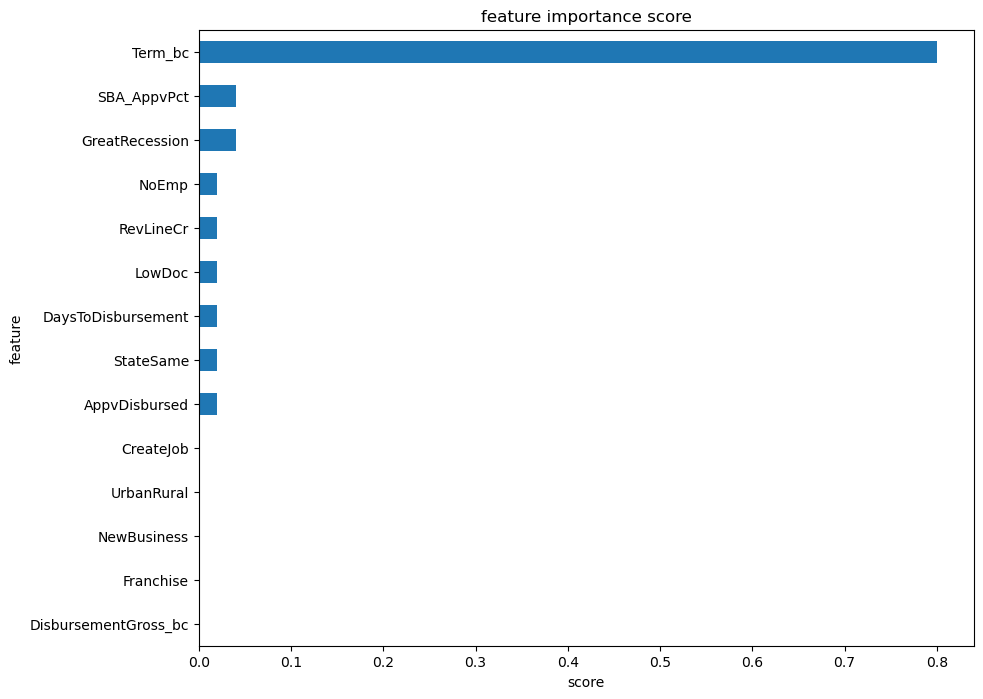

In [80]:
show_feature_importance(abc)

## GradientBoost

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
eval_classification(gbc)

Accuracy (Test Set) : 0.93
Precision (Test Set) : 0.85
Recall (Test Set) : 0.75
F-1-Score (Test Set) : 0.80
AUC (test-proba) : 0.96
AUC (train-proba) : 0.96
recall (crossval train): 0.7469256987048397
recall (crossval test): 0.6967234719381958


In [69]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = {
                    'learning_rate': [0.1,0.5],
                    'max_depth' : [3, 10],
                    'min_samples_split' : [2,5],
                    'n_estimators' : [100,200]
                  }
# Init model
gbc = GradientBoostingClassifier(random_state=42)
gbc_tuned = RandomizedSearchCV(gbc, hyperparameters, random_state=42, cv=5, scoring='recall', n_jobs=-1)
gbc_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = gbc_tuned.predict(X_test) 
eval_classification(gbc_tuned)

Accuracy (Test Set) : 0.95
Precision (Test Set) : 0.88
Recall (Test Set) : 0.85
F-1-Score (Test Set) : 0.87
AUC (test-proba) : 0.98
AUC (train-proba) : 0.99
roc_auc (crossval train): 0.9746414316802143
roc_auc (crossval test): 0.9045571662667402


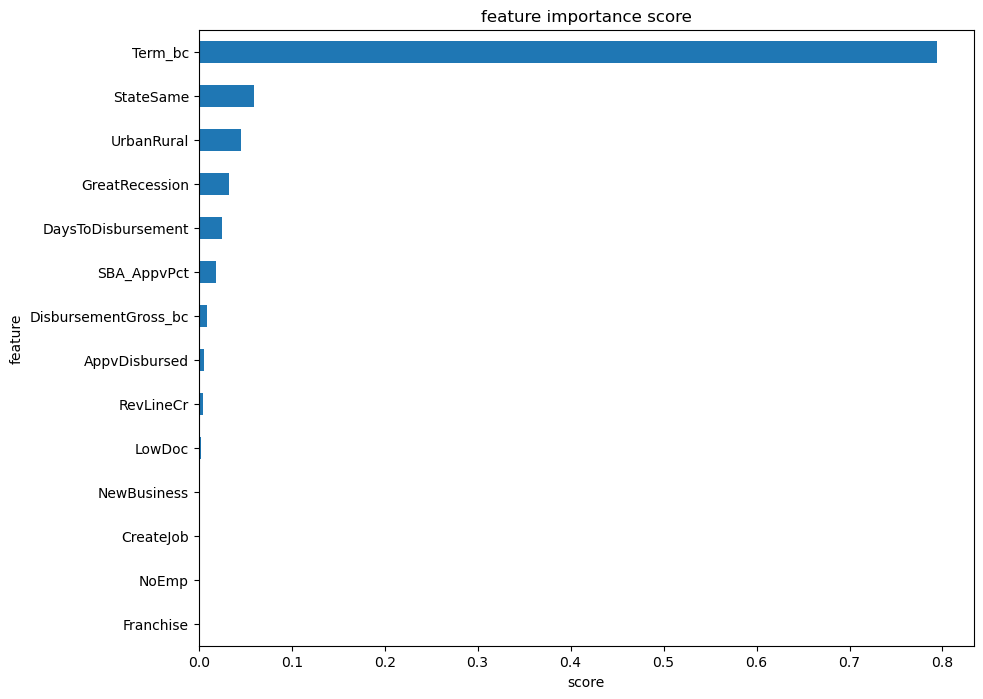

In [82]:
show_feature_importance(gbc)

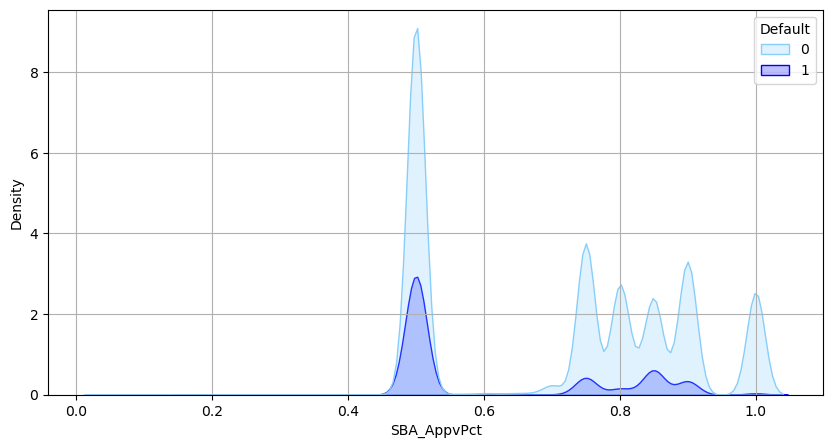

In [95]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=df1['SBA_AppvPct'], hue=df['Default'], palette=["#87CEFA", "blue"] , shade=True)
plt.grid()

In [88]:
from sklearn.metrics import confusion_matrix

Ytrue = y_train
Ypred = pd.Series(xg.predict(X_train))

cm_xg = confusion_matrix(Ytrue, Ypred)
cm_xg

array([[341464,   8264],
       [ 12911,  64092]])

In [89]:
TN = cm_xg[0][0]
FP = cm_xg[1][0]
FN = cm_xg[0][1]
TP = cm_xg[1][1]

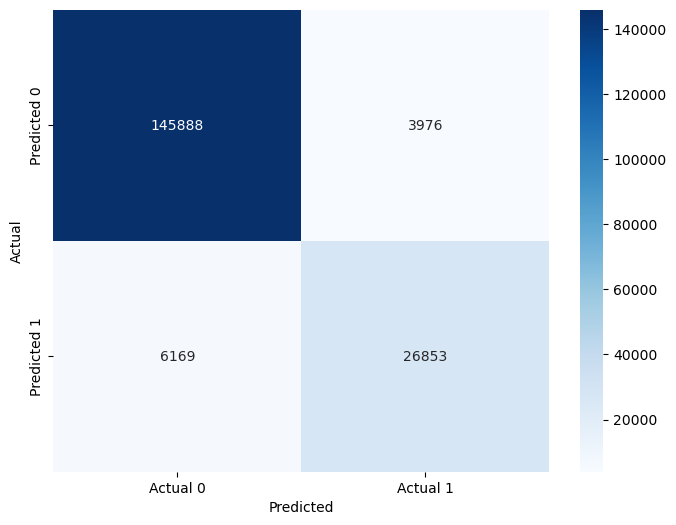

In [90]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung matriks kebingungan
cm = confusion_matrix(y_test, xg.predict(X_test))

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Menggunakan fmt='d' untuk angka tanpa notasi ilmiah
ax.xaxis.set_ticklabels(['Actual 0', 'Actual 1'])
ax.yaxis.set_ticklabels(['Predicted 0', 'Predicted 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [92]:
y_test.value_counts()

0    149864
1     33022
Name: Default, dtype: int64

In [281]:
y_train.sample(20)

470530    0
560244    0
510802    0
589721    0
726017    1
762783    0
72350     0
371075    0
531455    0
438358    0
227582    0
426200    0
244934    1
13314     0
497918    0
422941    0
476483    0
507941    0
479553    0
482121    1
Name: Default, dtype: int64

In [95]:
ApprvModel = TP / (TP + FN)
Chgoff = 33022
ChgoffModel =  FN
Pif = 149864
wrong_reject_loan = FP
print(f'persentase charge off sebelum model {round(Chgoff/(Chgoff+Pif)*100,2)}%')
print(f'persentase charge off setelah model {round(ApprvModel*100,2)}%')

persentase charge off sebelum model 18.06%
persentase charge off setelah model 88.58%


In [212]:
import joblib

In [213]:
joblib.dump(xg, 'loan_status_predict')

['loan_status_predict']

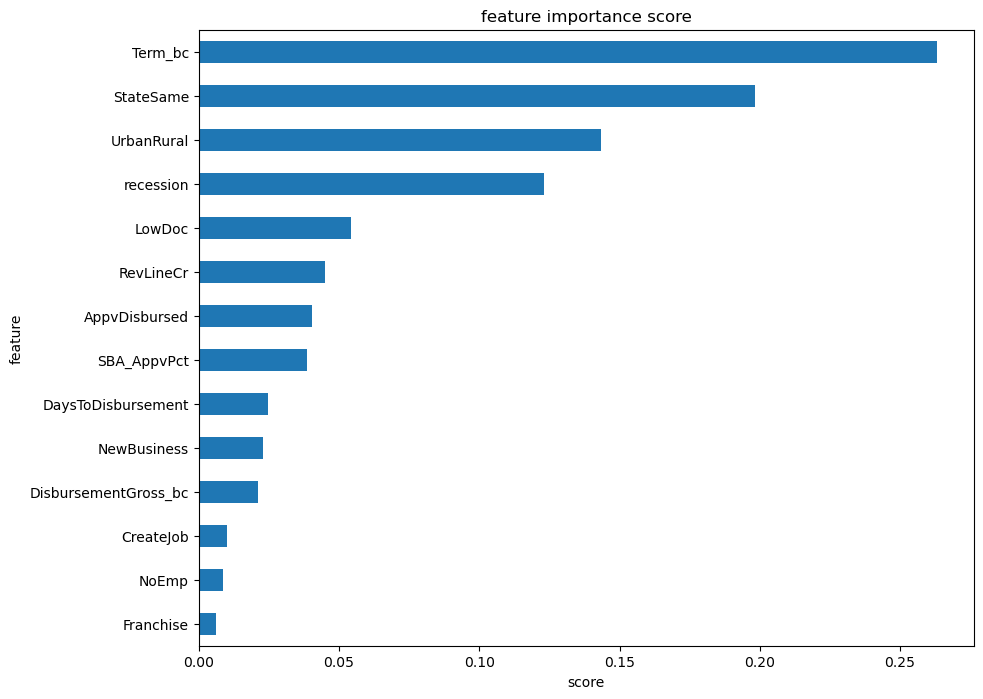

In [214]:
show_feature_importance(xg)

In [215]:
model = joblib.load('loan_status_predict')

In [323]:
import pandas as pd

df_pred = pd.DataFrame({
    'NoEmp': 0,
    'CreateJob': 0,
    'UrbanRural': 0,
    'RevLineCr': 0,
    'LowDoc': 0,
    'NewBusiness': 0,
    'DaysToDisbursement': 0,
    'StateSame': 0,
    'SBA_AppvPct': 0,
    'AppvDisbursed': 0,
    'Franchise': 0,
    'recession': 0,
    'Term_bc': 0,
    'DisbursementGross_bc': 0,
},index=[0])

model.predict(df_pred)

array([0])

In [285]:
df_pred.head()

,NoEmp,CreateJob,UrbanRural,RevLineCr,LowDoc,NewBusiness,DaysToDisbursement,StateSame,SBA_AppvPct,AppvDisbursed,Franchise,recession,Term_bc,DisbursementGross_bc
0,2,5,1,0,0,1,336,0,0.9,1,1,0,126,145000.0


In [286]:
result = model.predict(df_pred)

In [287]:
if result == 1:
    print('Not Approved')
else:
    print('Approved')

Not Approved


In [283]:
baris = df.iloc[244934][['NoEmp', 'CreateJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'NewBusiness', 'DaysToDisbursement', 'StateSame', 'SBA_AppvPct', 'AppvDisbursed', 'Franchise', 'recession', 'Term', 'DisbursementGross']]
print(baris)

NoEmp                        2
CreateJob                    5
UrbanRural                   1
RevLineCr                    0
LowDoc                       0
NewBusiness                  1
DaysToDisbursement         336
StateSame                    0
SBA_AppvPct                0.9
AppvDisbursed                1
Franchise                    1
recession                    0
Term                       126
DisbursementGross     145000.0
Name: 337909, dtype: object


In [164]:
print(df[df['Default'] == 1].sample(n=1).T)

                                      535313
LoanNr_ChkDgt                     5231365005
Name                     PARACLETE REHAB INC
City                                   ALLEN
State                                     TX
Zip                                    75002
Bank                            COMPASS BANK
BankState                                 AL
NAICS                                 621399
ApprovalDate             2012-05-23 00:00:00
ApprovalFY                              2012
Term                                      61
NoEmp                                      2
NewExist                                   2
CreateJob                                  2
RetainedJob                                2
FranchiseCode                              0
UrbanRural                                 1
RevLineCr                                  1
LowDoc                                     0
DisbursementDate         2012-06-01 00:00:00
DisbursementGross                    49669.0
BalanceGro